# Quantum Trajectories

https://www.nature.com/articles/nature05589

https://nbviewer.jupyter.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-6-Quantum-Monte-Carlo-Trajectories.ipynb


## Decaying coherent state

In [16]:
N = 30               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath

tlist = np.linspace(0,0.6,100)

a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian

psi0 = coherent(N,2)

c_op_list = [np.sqrt(kappa)* a]
mc = mcsolve(H, psi0, tlist, c_op_list)

10.0%. Run time:   0.19s. Est. time left: 00:00:00:01
20.0%. Run time:   0.30s. Est. time left: 00:00:00:01
30.0%. Run time:   0.40s. Est. time left: 00:00:00:00
40.0%. Run time:   0.50s. Est. time left: 00:00:00:00
50.0%. Run time:   0.60s. Est. time left: 00:00:00:00
60.0%. Run time:   0.70s. Est. time left: 00:00:00:00
70.0%. Run time:   0.80s. Est. time left: 00:00:00:00
80.0%. Run time:   0.90s. Est. time left: 00:00:00:00
90.0%. Run time:   1.01s. Est. time left: 00:00:00:00
100.0%. Run time:   1.10s. Est. time left: 00:00:00:00
Total run time:   1.21s


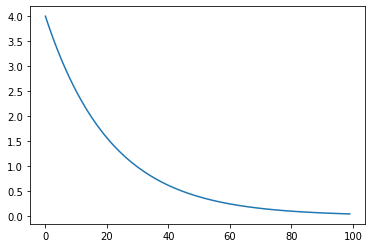

In [17]:
plt.plot(expect(a.dag()*a,mc.states[0]))

What!? Why are there no quantum jumps in the ensemble members?!!?

## Decaying Fock state

In [29]:
psi0 = fock(N,4)

c_op_list = [np.sqrt(kappa)* a]
mc = mcsolve(H, psi0, tlist, c_op_list)

10.0%. Run time:   0.16s. Est. time left: 00:00:00:01
20.0%. Run time:   0.27s. Est. time left: 00:00:00:01
30.0%. Run time:   0.36s. Est. time left: 00:00:00:00
40.0%. Run time:   0.45s. Est. time left: 00:00:00:00
50.0%. Run time:   0.54s. Est. time left: 00:00:00:00
60.0%. Run time:   0.63s. Est. time left: 00:00:00:00
70.0%. Run time:   0.72s. Est. time left: 00:00:00:00
80.0%. Run time:   0.82s. Est. time left: 00:00:00:00
90.0%. Run time:   0.91s. Est. time left: 00:00:00:00
100.0%. Run time:   1.00s. Est. time left: 00:00:00:00
Total run time:   1.02s


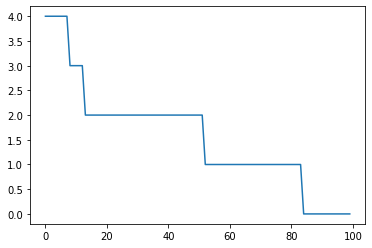

In [36]:
plt.plot(expect(a.dag()*a,mc.states[0]))

OMG, what is going on? 

As Rik pointed out, coherent states always  decay smoothly... since the a operator commutes with a coherent state, therefore after collapsing and renormalising, nothing happens!

But: what is going on in the Haroche experiment then: they started with a coherent state!!!!

Answer is actually a bit subtle! But first, let's try some stuff out. 

## Photon number collapse operator on a coherent state

In [23]:
N = 30               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath

tlist = np.linspace(0,0.6,100)

a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian

psi0 = coherent(N,2)

c_op_list = [np.sqrt(kappa)* a, np.sqrt(10*kappa) * H]
mc = mcsolve(H, psi0, tlist, c_op_list)

10.0%. Run time:   6.10s. Est. time left: 00:00:00:54
20.0%. Run time:  11.67s. Est. time left: 00:00:00:46
30.0%. Run time:  17.67s. Est. time left: 00:00:00:41
40.0%. Run time:  23.42s. Est. time left: 00:00:00:35
50.0%. Run time:  29.36s. Est. time left: 00:00:00:29
60.0%. Run time:  35.37s. Est. time left: 00:00:00:23
70.0%. Run time:  41.04s. Est. time left: 00:00:00:17
80.0%. Run time:  46.98s. Est. time left: 00:00:00:11
90.0%. Run time:  52.71s. Est. time left: 00:00:00:05
100.0%. Run time:  58.74s. Est. time left: 00:00:00:00
Total run time:  58.81s


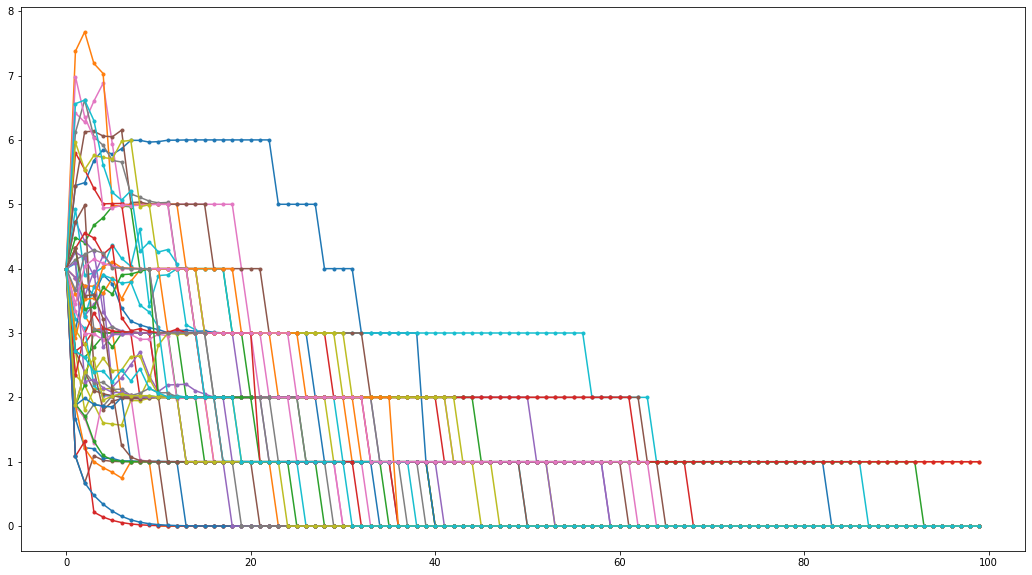

In [27]:
plt.figure(figsize=(18,10))
for i in range(50):
    plt.plot(expect(a.dag()*a,mc.states[i]),'.-')


# Position measurement on a coherent state

In [35]:
N = 30               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath
kappa /= 10

tlist = np.linspace(0,0.6,100)

a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian

psi0 = coherent(N,2)

c_op_list = [np.sqrt(kappa)* (a+a.dag())]
mc = mcsolve(H, psi0, tlist, c_op_list)

10.0%. Run time:   0.19s. Est. time left: 00:00:00:01
20.0%. Run time:   0.31s. Est. time left: 00:00:00:01
30.0%. Run time:   0.43s. Est. time left: 00:00:00:00
40.0%. Run time:   0.53s. Est. time left: 00:00:00:00
50.0%. Run time:   0.64s. Est. time left: 00:00:00:00
60.0%. Run time:   0.74s. Est. time left: 00:00:00:00
70.0%. Run time:   0.85s. Est. time left: 00:00:00:00
80.0%. Run time:   0.96s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
100.0%. Run time:   1.20s. Est. time left: 00:00:00:00
Total run time:   1.21s


In [36]:

def update(i=0):
    plt.figure(figsize=(18,10))
    plt.plot(expect(a.dag()*a,mc.states[i]),'.-')
    
interact(update,i=(0,len(mc.states)-1))

interactive(children=(IntSlider(value=0, description='i', max=499), Output()), _dom_classes=('widget-interact'…

<function __main__.update(i=0)>

In [37]:

def update(i=0):
    plt.figure(figsize=(18,10))
    plt.plot(expect(a.dag()+a,mc.states[i]),'.-')
    
interact(update,i=(0,len(mc.states)-1))

interactive(children=(IntSlider(value=0, description='i', max=499), Output()), _dom_classes=('widget-interact'…

<function __main__.update(i=0)>

In [39]:
result = mesolve(H, psi0, tlist, c_op_list)